## Socio-economic status Influences on Family Planning and Birth Rates in different California counties 

### Step1: Data Loading

#### First, we'll need to load each of the datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
family_plan_demographic = pd.read_csv('2014~2020 family plan demographic.csv').drop(labels=["Annotation Code","Annotation Description"], axis=1)
family_plan_demographic

,Fiscal Year,Client County,Clients Served,Clients Served %,Average Age of Clients Served,Adolescents Clients Served,Adolescents Clients Served %,Male Clients Served,Male Clients Served %,Latino Clients Served,...,Asian/Pacific Islander Clients served,Asian/Pacific Islander Clients Served %,Other (Including Native American) Clients Served,Other (Including Native American) Clients Served %,Spanish Speaking Clients Served,Spanish Speaking Clients Served %,English Speaking Clients Served,English Speaking Clients Served %,Other Language,Other Language %
0,2014-15,California,"1,379,522",100%,28.8,"189,069",13.70%,"241,130",17.50%,"925,065",...,"85,824",6.20%,"44,445",3.20%,"559,227",40.50%,"780,147",56.60%,"40,060",2.90%
1,2014-15,Alameda,"35,953",2.60%,26.1,"8,644",24.00%,"4,848",13.50%,"16,160",...,"5,252",14.60%,"2,285",6.40%,"10,176",28.30%,"24,437",68.00%,"1,340",3.70%
2,2014-15,Alpine,52,<0.1%,25.5,16,<0.1%,NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,36,69.20%,NaN,NaN
3,2014-15,Amador,585,<0.1%,24.9,133,22.70%,42,7.20%,80,...,NaN,NaN,24,4.10%,40,6.80%,539,92.10%,NaN,NaN
4,2014-15,Butte,"11,299",0.80%,24.2,"2,420",21.40%,"1,073",9.50%,"2,375",...,466,4.10%,522,4.60%,693,6.10%,"10,432",92.30%,174,1.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2019-20,Tulare,"7,517",1.14%,28.3,"1,225",16.30%,935,12.44%,"6,100",...,127,1.69%,123,1.64%,"2,836",37.73%,"4,641",61.74%,40,0.53%
350,2019-20,Tuolumne,109,0.02%,25.6,23,21.10%,NaN,NaN,28,...,NaN,NaN,NaN,NaN,13,11.93%,96,88.07%,NaN,NaN
351,2019-20,Ventura,"12,302",1.87%,28.5,"1,496",12.16%,"1,336",10.86%,"9,017",...,405,3.29%,409,3.32%,"5,014",40.76%,"7,033",57.17%,255,2.07%
352,2019-20,Yolo,"3,055",0.46%,23.7,994,32.54%,409,13.39%,"1,834",...,311,10.18%,118,3.86%,815,26.68%,"2,194",71.82%,46,1.51%


### Step 2: data exploration - process different datatype

In [3]:
#show datatype of each columns
family_plan_demographic.dtypes

Fiscal Year                                            object
Client County                                          object
Clients Served                                         object
Clients Served %                                       object
Average Age of Clients Served                         float64
Adolescents Clients Served                             object
Adolescents Clients Served %                           object
Male Clients Served                                    object
Male Clients Served %                                  object
Latino Clients Served                                  object
Latino Clients Served %                                object
White Clients Served                                   object
 White Clients Served %                                object
African American Clients Served                        object
 African American Black Clients Served %               object
Asian/Pacific Islander Clients served                  object
Asian/Pa

#### data exploration: datatype
#### 1、we could see that most of the columns are 'object' type, we should cast them into some numerical datatype
#### 2、notice that we have percentage data and some operator occur in these columns, we should also cast them into float number and record these columns
#### 3、also some columns use comma counting method to store number, we also cast them to float datatype in case to fit model

In [4]:
#get percentage-like columns
percentage_cols = list(filter(lambda x:"%" in x, family_plan_demographic.columns))
exclude_cols = ["Fiscal Year", "Client County"]
#for convience, we remove the operator and use its boundary value as replacement
#notice that nan is also float value, so we turn all value to str first and that cast it back to float
for col in family_plan_demographic.columns:
    if col in percentage_cols:
        val = family_plan_demographic[col].astype(str)
        dtype = family_plan_demographic[col].dtype
        family_plan_demographic[col] = list(map(lambda x:float(x.replace("<","").replace("%","")), val))
    elif col not in exclude_cols:
        val = family_plan_demographic[col].astype(str)
        family_plan_demographic[col] = list(map(lambda x:float(x.replace(",","")), val))
    else:
        continue

#### data exploration: invalid data handling
#### 1、now we have dataset mostly in numerical datatype
#### 2、now we check the missing data rate in each county and drop these data because it is not significant for us to do statistical analysis


In [5]:
family_plan_demographic.dtypes

Fiscal Year                                            object
Client County                                          object
Clients Served                                        float64
Clients Served %                                      float64
Average Age of Clients Served                         float64
Adolescents Clients Served                            float64
Adolescents Clients Served %                          float64
Male Clients Served                                   float64
Male Clients Served %                                 float64
Latino Clients Served                                 float64
Latino Clients Served %                               float64
White Clients Served                                  float64
 White Clients Served %                               float64
African American Clients Served                       float64
 African American Black Clients Served %              float64
Asian/Pacific Islander Clients served                 float64
Asian/Pa

In [6]:
family_plan_demographic

,Fiscal Year,Client County,Clients Served,Clients Served %,Average Age of Clients Served,Adolescents Clients Served,Adolescents Clients Served %,Male Clients Served,Male Clients Served %,Latino Clients Served,...,Asian/Pacific Islander Clients served,Asian/Pacific Islander Clients Served %,Other (Including Native American) Clients Served,Other (Including Native American) Clients Served %,Spanish Speaking Clients Served,Spanish Speaking Clients Served %,English Speaking Clients Served,English Speaking Clients Served %,Other Language,Other Language %
0,2014-15,California,1379522.0,100.00,28.8,189069.0,13.70,241130.0,17.50,925065.0,...,85824.0,6.20,44445.0,3.20,559227.0,40.50,780147.0,56.60,40060.0,2.90
1,2014-15,Alameda,35953.0,2.60,26.1,8644.0,24.00,4848.0,13.50,16160.0,...,5252.0,14.60,2285.0,6.40,10176.0,28.30,24437.0,68.00,1340.0,3.70
2,2014-15,Alpine,52.0,0.10,25.5,16.0,0.10,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,36.0,69.20,NaN,NaN
3,2014-15,Amador,585.0,0.10,24.9,133.0,22.70,42.0,7.20,80.0,...,NaN,NaN,24.0,4.10,40.0,6.80,539.0,92.10,NaN,NaN
4,2014-15,Butte,11299.0,0.80,24.2,2420.0,21.40,1073.0,9.50,2375.0,...,466.0,4.10,522.0,4.60,693.0,6.10,10432.0,92.30,174.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2019-20,Tulare,7517.0,1.14,28.3,1225.0,16.30,935.0,12.44,6100.0,...,127.0,1.69,123.0,1.64,2836.0,37.73,4641.0,61.74,40.0,0.53
350,2019-20,Tuolumne,109.0,0.02,25.6,23.0,21.10,NaN,NaN,28.0,...,NaN,NaN,NaN,NaN,13.0,11.93,96.0,88.07,NaN,NaN
351,2019-20,Ventura,12302.0,1.87,28.5,1496.0,12.16,1336.0,10.86,9017.0,...,405.0,3.29,409.0,3.32,5014.0,40.76,7033.0,57.17,255.0,2.07
352,2019-20,Yolo,3055.0,0.46,23.7,994.0,32.54,409.0,13.39,1834.0,...,311.0,10.18,118.0,3.86,815.0,26.68,2194.0,71.82,46.0,1.51


In [7]:
#we validate in each county and print its missing ratio
Countys = family_plan_demographic["Client County"].drop_duplicates().values.tolist()

In [8]:
missing_data_rate_pd = {}
exclude_cols = ["Fiscal Year", "Client County"]
for county in Countys:
    county_data = family_plan_demographic[family_plan_demographic["Client County"] == county]
    missing_data_rate = county_data.drop(labels=exclude_cols, axis=1).isna().sum() / len(county_data)
    missing_data_rate_pd[county] = missing_data_rate    
missing_data_rate_pd = pd.DataFrame(missing_data_rate_pd).T

#### data exploration: filling missing values, actually the lastest data in family_plan_demographic is 2020, so we create an forecast here

In [9]:
mean_values = family_plan_demographic.groupby("Client County").mean()

In [10]:
#after groupby operation the fiscal year column disapper because of its datatype, and county become index, so we add these info back and create new dataframe by concat operation
mean_values["Fiscal Year"] = "2020-21"
mean_values["Client County"] = mean_values.index.values
#reset index so that we could concat with original dataframe
mean_values = mean_values.reset_index(drop=True)

In [11]:
#now we have a filled dataframe
family_plan_demographic_filled = pd.concat([family_plan_demographic, mean_values]).reset_index(drop=True)

In [12]:
#do it again to fill 2021-22 data
mean_values = family_plan_demographic_filled.groupby("Client County").mean()
mean_values["Fiscal Year"] = "2021-22"
mean_values["Client County"] = mean_values.index.values
#reset index so that we could concat with original dataframe
mean_values = mean_values.reset_index(drop=True)

In [13]:
family_plan_demographic_filled = pd.concat([family_plan_demographic_filled, mean_values]).reset_index(drop=True)

In [15]:
#we only care about the data after 2017 so we filter out other records
time_mask = family_plan_demographic_filled["Fiscal Year"] >= "2017-18"
family_plan_demographic_analysis = family_plan_demographic_filled[time_mask]

In [16]:
family_plan_demographic_analysis

,Fiscal Year,Client County,Clients Served,Clients Served %,Average Age of Clients Served,Adolescents Clients Served,Adolescents Clients Served %,Male Clients Served,Male Clients Served %,Latino Clients Served,...,Asian/Pacific Islander Clients served,Asian/Pacific Islander Clients Served %,Other (Including Native American) Clients Served,Other (Including Native American) Clients Served %,Spanish Speaking Clients Served,Spanish Speaking Clients Served %,English Speaking Clients Served,English Speaking Clients Served %,Other Language,Other Language %
177,2017-18,California,940309.000000,100.000000,29.400000,124121.000000,13.200000,173410.000000,18.440000,639476.000000,...,58608.000000,6.230000,31226.000000,3.320000,353767.000000,37.620000,555860.000000,59.110000,30638.000000,3.260000
178,2017-18,Alameda,25546.000000,2.720000,25.600000,6705.000000,26.250000,3502.000000,13.710000,12202.000000,...,3904.000000,15.280000,1581.000000,6.190000,7175.000000,28.090000,17478.000000,68.420000,893.000000,3.500000
179,2017-18,Alpine,42.000000,0.100000,26.400000,NaN,NaN,NaN,NaN,20.000000,...,NaN,NaN,NaN,NaN,14.000000,33.330000,24.000000,57.140000,NaN,NaN
180,2017-18,Amador,227.000000,0.100000,25.900000,41.000000,18.060000,NaN,NaN,58.000000,...,NaN,NaN,14.000000,6.170000,27.000000,11.890000,194.000000,85.460000,NaN,NaN
181,2017-18,Butte,6641.000000,0.710000,23.600000,1370.000000,20.630000,644.000000,9.700000,1837.000000,...,323.000000,4.860000,421.000000,6.340000,408.000000,6.140000,6140.000000,92.460000,93.000000,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2021-22,Tulare,9723.166667,0.971667,28.350000,1473.166667,13.120000,962.166667,8.948333,7978.666667,...,181.000000,1.860000,144.666667,1.496667,4134.666667,42.068333,5527.333333,57.318333,61.166667,0.613333
468,2021-22,Tuolumne,238.833333,0.086667,24.766667,60.500000,19.478333,21.500000,5.685000,38.166667,...,NaN,NaN,22.000000,4.800000,18.600000,8.608000,220.166667,91.653333,NaN,NaN
469,2021-22,Ventura,16184.333333,1.606667,28.050000,2124.333333,10.890000,1912.000000,10.026667,11512.000000,...,495.833333,3.060000,496.333333,3.075000,6674.500000,101.215000,9220.333333,56.783333,289.500000,1.801667
470,2021-22,Yolo,3554.000000,0.358333,24.233333,1067.500000,25.928333,423.000000,10.361667,2103.500000,...,341.833333,9.616667,144.833333,4.016667,1046.833333,29.458333,2436.166667,68.588333,71.000000,1.970000


In [12]:
# # code of yyb
# # filter the data for the past 6 years 
# past_six_years = df[df"Fiscal Year"].isin(str(year) for year in range (2014-15,2019-20)])]
# # calculate the mean for each county 
# mean_values = past_six_years.groupby("client County").mean()
# # create a new DataFrame for 2021 predictions
# prediction_2021 = mean_values.rest_index()
# predictions_2021["Fiscal Year"] = "2021"
# predictions_2021 

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (319826593.py, line 2)

#### Step 2: data combination: combine different dataset via key 'county'
#### 1、notice that the county has different name in each dataset, we need to rename these columns

In [17]:
Education_level = pd.read_excel('Education.xlsx').dropna()
Education_level

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970–2021",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
2,Federal Information Processing Standard (FIPS)...,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...
5,01001,AL,Autauga County,2,2,2,2,6611,3757,933,...,29.618142,21.707831,4126,12977,11367,11144,10.41551,32.758621,28.694401,28.131469
6,01003,AL,Baldwin County,4,5,3,2,18726,8426,2334,...,31.819503,27.741591,14555,44342,50518,52562,8.985844,27.375492,31.188379,32.450286
7,01005,AL,Barbour County,6,6,6,6,8120,2242,581,...,25.771784,14.524286,4378,6600,5010,2007,24.32898,36.676855,27.841067,11.153098
8,01007,AL,Bibb County,1,1,1,1,5272,1402,238,...,25.538085,8.996005,3125,7052,3967,1913,19.461917,43.91854,24.705736,11.913807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,56037,WY,Sweetwater County,5,8,5,8,4393,3731,986,...,37.275232,17.006235,2029,9069,11324,5394,7.294363,32.603538,40.710383,19.391717
3205,56039,WY,Teton County,7,8,7,8,708,908,524,...,23.332485,48.994399,701,2984,3755,10219,3.969647,16.897899,21.263945,57.868509
3206,56041,WY,Uinta County,7,8,7,8,1569,1517,445,...,35.045548,18.272985,851,4820,5186,2376,6.430892,36.424091,39.189904,17.955112
3207,56043,WY,Washakie County,7,11,7,11,1572,1437,590,...,35.062865,23.339826,320,1391,2293,1419,5.900793,25.650009,42.282869,26.166329


In [18]:
#the columns of data is some kind of notes, we need to fix it,correct columns is row 1
correct_columns = Education_level.iloc[0].values
Education_level.columns = correct_columns
#skip first row
Education_level = Education_level.iloc[1:]

In [19]:
#select records in CA
Education_level = Education_level[Education_level["State"] == "CA"]

In [20]:
#rename Area name
rename_map = {}
for col in Education_level.columns:
    if col == "Area name":rename_map[col] = "Client County"
    else:rename_map[col] = col
Education_level = Education_level.rename(rename_map, axis=1)

In [21]:
#replace the 'county' in Client County
Education_level["Client County"] = Education_level["Client County"].apply(lambda x:x.replace("County", "").strip())

In [22]:
Education_level

,Federal Information Processing Standard (FIPS) Code,State,Client County,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
204,06001,CA,Alameda,1,1,1,1,217589,197371,87675,...,25.609497,41.12506,131272,198825,271096,592670,10.995566,16.653921,22.707463,49.643049
205,06003,CA,Alpine,8,4,8,4,101,98,57,...,33.083645,31.710362,61,249,278,381,6.29515,25.696594,28.68937,39.318885
206,06005,CA,Amador,6,4,6,4,2911,2314,1214,...,40.811167,18.77944,2757,9724,13052,6192,8.690307,30.650906,41.141056,19.51773
207,06007,CA,Butte,3,2,3,2,24482,17743,8511,...,39.842663,23.989662,13734,31704,54420,42309,9.66047,22.300534,38.278925,29.760071
208,06009,CA,Calaveras,6,6,6,6,4164,2721,1127,...,42.452159,20.783222,3214,10815,13963,6959,9.195731,30.943321,39.950216,19.910732
209,06011,CA,Colusa,6,4,6,4,3104,2188,1011,...,31.405339,13.516416,3719,4246,3934,2043,26.674796,30.454741,28.216899,14.653565
210,06013,CA,Contra Costa,1,1,1,1,96353,101602,50423,...,30.715678,38.648017,82564,140633,227162,354661,10.256143,17.469504,28.218181,44.056173
211,06015,CA,Del Norte,7,8,7,8,3970,2592,801,...,35.274424,13.832809,3825,6101,6601,3176,19.413287,30.964828,33.502512,16.119373
212,06017,CA,El Dorado,1,1,1,1,9251,9356,4194,...,39.39932,31.349826,7421,28993,51667,51363,5.32185,20.791859,37.05215,36.834141
213,06019,CA,Fresno,2,2,2,2,100900,59798,30997,...,30.719533,19.41738,136835,140532,201826,140183,22.092396,22.689287,32.585376,22.63294


In [23]:
Birth_rate = pd.read_excel('Birthrate.xlsx')
Birth_rate

,Year,County,# of Birth,Population,Birth Rate
0,2017,Alameda,18896.0,1666756,0.0113
1,2017,Alpine,NaN,1089,0.0000
2,2017,Amador,303.0,39405,0.0077
3,2017,Butte,2389.0,230339,0.0104
4,2017,Calaveras,421.0,45698,0.0092
...,...,...,...,...,...
285,2021,Tulare,6800.0,476946,0.0143
286,2021,Tuolumne,458.0,55065,0.0083
287,2021,Ventura,8785.0,839358,0.0105
288,2021,Yolo,1965.0,213039,0.0092


In [24]:
#also rename
rename_map = {}
for col in Birth_rate.columns:
    if col == "County":rename_map[col] = "Client County"
    elif col == "Year":rename_map[col] = "Fiscal Year"
    else:rename_map[col] = col
Birth_rate = Birth_rate.rename(rename_map, axis=1)

In [25]:
Birth_rate

,Fiscal Year,Client County,# of Birth,Population,Birth Rate
0,2017,Alameda,18896.0,1666756,0.0113
1,2017,Alpine,NaN,1089,0.0000
2,2017,Amador,303.0,39405,0.0077
3,2017,Butte,2389.0,230339,0.0104
4,2017,Calaveras,421.0,45698,0.0092
...,...,...,...,...,...
285,2021,Tulare,6800.0,476946,0.0143
286,2021,Tuolumne,458.0,55065,0.0083
287,2021,Ventura,8785.0,839358,0.0105
288,2021,Yolo,1965.0,213039,0.0092


In [26]:
County_Revenues = pd.read_csv("03~21 County_Revenues_Per_Capita.csv")
County_Revenues

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,Alameda,2021,4251409856,1662370,2557
1,Alameda,2020,3752904942,1670834,2246
2,Alameda,2019,3609996506,1669301,2163
3,Alameda,2018,3057808028,1660202,1842
4,Alameda,2017,2949248612,1645359,1792
...,...,...,...,...,...
1078,Yuba,2007,126481406,70745,1788
1079,Yuba,2006,120119483,69827,1720
1080,Yuba,2005,100090654,66734,1500
1081,Yuba,2004,96186352,64840,1483


In [27]:
#rename
rename_map = {}
for col in County_Revenues.columns:
    if col == "Entity Name":rename_map[col] = "Client County"
    else:rename_map[col] = col
County_Revenues = County_Revenues.rename(rename_map, axis=1)

In [28]:
County_Revenues

,Client County,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,Alameda,2021,4251409856,1662370,2557
1,Alameda,2020,3752904942,1670834,2246
2,Alameda,2019,3609996506,1669301,2163
3,Alameda,2018,3057808028,1660202,1842
4,Alameda,2017,2949248612,1645359,1792
...,...,...,...,...,...
1078,Yuba,2007,126481406,70745,1788
1079,Yuba,2006,120119483,69827,1720
1080,Yuba,2005,100090654,66734,1500
1081,Yuba,2004,96186352,64840,1483


In [29]:
#we align the fiscal year(datatype)
family_plan_demographic_analysis["Fiscal Year"] = family_plan_demographic_analysis["Fiscal Year"].apply(lambda x:float(x.split("-")[0]))

/tmp/ipykernel_401/725813869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_plan_demographic_analysis["Fiscal Year"] = family_plan_demographic_analysis["Fiscal Year"].apply(lambda x:float(x.split("-")[0]))


In [30]:
County_Revenues["Fiscal Year"] = County_Revenues["Fiscal Year"].values.astype(float)

In [31]:
#filter out data before 2017
County_Revenues_analysis = County_Revenues[County_Revenues["Fiscal Year"] >= 2017]

In [32]:
#merge data via 'county'
combined_dataset_part1 = family_plan_demographic_analysis.merge(County_Revenues_analysis, on=["Client County", "Fiscal Year"], how="outer").merge(Birth_rate, on=["Client County", "Fiscal Year"], how="outer")

In [33]:
combined_dataset_analysis = combined_dataset_part1.merge(Education_level, on="Client County", how="left")

In [34]:
#still have different datatytpe
for col in combined_dataset_analysis.columns:
    if col in ["State", "Client County"]:continue
    combined_dataset_analysis[col] = combined_dataset_analysis[col].astype(float)

In [35]:
combined_dataset_analysis.dtypes

Fiscal Year                                                                 float64
Client County                                                                object
Clients Served                                                              float64
Clients Served %                                                            float64
Average Age of Clients Served                                               float64
                                                                             ...   
Bachelor's degree or higher, 2017-21                                        float64
Percent of adults with less than a high school diploma, 2017-21             float64
Percent of adults with a high school diploma only, 2017-21                  float64
Percent of adults completing some college or associate's degree, 2017-21    float64
Percent of adults with a bachelor's degree or higher, 2017-21               float64
Length: 85, dtype: object

In [36]:
gb_combined_dataset_analysis = combined_dataset_analysis.groupby("Client County").mean().drop(labels=["Fiscal Year"], axis=1)

In [126]:
#save data
gb_combined_dataset_analysis.to_csv("analysis_dataset_period17-21.csv")

### Step 3: data analysis

<AxesSubplot:>

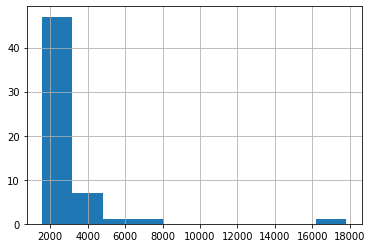

In [37]:
#label our data
gb_combined_dataset_analysis["Revenues Per Capita"].hist()

In [38]:
#get the upper bound and lower bound
lower = np.nanquantile(gb_combined_dataset_analysis["Revenues Per Capita"].values, q=0.1)
upper = np.nanquantile(gb_combined_dataset_analysis["Revenues Per Capita"].values, q=0.9)
#we assign label based on upper/lower bound -> 0 means low, 1 means mid , 2 means high
gb_combined_dataset_analysis["Revenue Score"] = np.ones(len(gb_combined_dataset_analysis))
gb_combined_dataset_analysis["Revenue Score"].loc[gb_combined_dataset_analysis["Revenues Per Capita"] > upper] = 2
gb_combined_dataset_analysis["Revenue Score"].loc[gb_combined_dataset_analysis["Revenues Per Capita"] < lower] = 0

In [39]:
#assign a weighted score to each record based on its percent of education level, from 1 to 4
gb_combined_dataset_analysis["Education Level Score"] = (gb_combined_dataset_analysis['Percent of adults with less than a high school diploma, 2017-21'] + \
                                                     2 * gb_combined_dataset_analysis['Percent of adults with a high school diploma only, 2017-21'] + \
                                                     3 * gb_combined_dataset_analysis["Percent of adults completing some college or associate's degree, 2017-21"] + \
                                                     4 * gb_combined_dataset_analysis["Percent of adults with a bachelor's degree or higher, 2017-21"]) / 10

In [40]:
#drop 'california'
gb_combined_dataset_analysis = gb_combined_dataset_analysis[gb_combined_dataset_analysis.index != "California"]

In [41]:
gb_combined_dataset_analysis["Education Level"] = np.ones(len(gb_combined_dataset_analysis))
lower = np.nanquantile(gb_combined_dataset_analysis["Education Level Score"].values, q=0.1)
upper = np.nanquantile(gb_combined_dataset_analysis["Education Level Score"].values, q=0.9)
gb_combined_dataset_analysis["Education Level"].loc[gb_combined_dataset_analysis["Education Level Score"] > upper] = 2
gb_combined_dataset_analysis["Education Level"].loc[gb_combined_dataset_analysis["Education Level Score"] < lower] = 0

In [42]:
#create SES Score
gb_combined_dataset_analysis["SES Score"] = gb_combined_dataset_analysis["Revenue Score"] + gb_combined_dataset_analysis["Education Level"]

In [43]:
#assign SES level 0: low 1:mid 2:high
#when SES = 0, we assign 0 when SES between 1 ~ 3, we assign mid, others we assign high
gb_combined_dataset_analysis["SES Level"] = np.ones(len(gb_combined_dataset_analysis))
gb_combined_dataset_analysis["SES Level"].loc[gb_combined_dataset_analysis["SES Score"] == 1] = 0
gb_combined_dataset_analysis["SES Level"].loc[gb_combined_dataset_analysis["SES Score"] == 3] = 2

In [44]:
gb_combined_dataset_analysis.to_csv("analysis_dataset_period17-21_clean.csv")

#### Step 4: statistical analysis
#### 1、build classification model 

In [50]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [54]:
#use ols to fit a linear model
X = gb_combined_dataset_analysis[["Clients Served %", "SES Score"]]
y = gb_combined_dataset_analysis["Birth Rate"]
#add intercept 
X = sm.add_constant(X)
#fit model
model = sm.OLS(y, X).fit()

In [56]:
#check summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Birth Rate   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     10.46
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           0.000141
Time:                        08:00:20   Log-Likelihood:                 272.48
No. Observations:                  58   AIC:                            -539.0
Df Residuals:                      55   BIC:                            -532.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0147      0.001  

In [58]:
#remove unsignificant factor
X = gb_combined_dataset_analysis["SES Score"]
y = gb_combined_dataset_analysis["Birth Rate"]
#add intercept 
X = sm.add_constant(X)
#fit model
model = sm.OLS(y, X).fit()

In [59]:
#check summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Birth Rate   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     21.18
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.44e-05
Time:                        08:08:22   Log-Likelihood:                 272.44
No. Observations:                  58   AIC:                            -540.9
Df Residuals:                      56   BIC:                            -536.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0148      0.001     15.341      0.0

In [60]:
intercept, slope = model.params

In [66]:
#create regression line
x = np.linspace(1, 3, 50)
y = slope * x + intercept

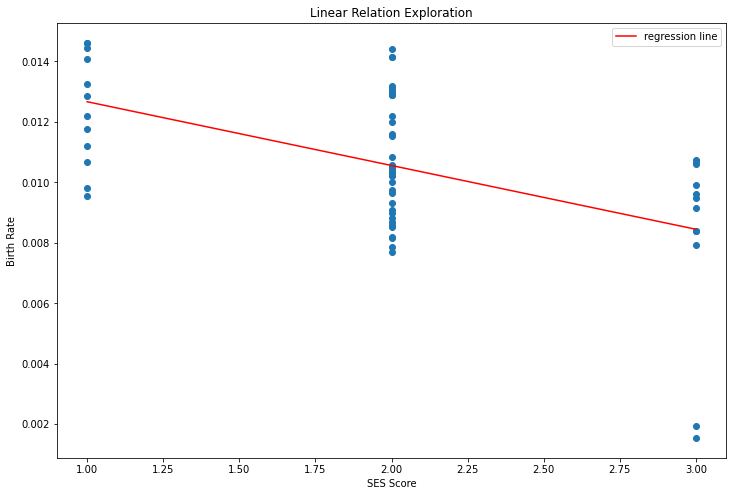

In [69]:
#data visualization
fig = plt.figure(figsize=[12,8])
plt.title("Linear Relation Exploration")
plt.xlabel("SES Score")
plt.ylabel("Birth Rate")
plt.scatter(gb_combined_dataset_analysis["SES Score"], gb_combined_dataset_analysis["Birth Rate"])
plt.plot(x, y, c='r',label="regression line")
plt.legend()
plt.show()